# Project Title - Google PlayStore Apps

In the below project I have used google playstore apps dataset which i got from kaggle.com .In the below dataset colums include name , ratings, Geners , reviews ,category etc. I am going to perform Exploratory data analysis on the data set and get some insights for the data and display it to you.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The data set is been downloaded from kaggle.com using opendatasets library.

In [7]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [8]:
# Change this
dataset_url = 'https://www.kaggle.com/lava18/google-play-store-apps' 

In [9]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ghogaleomkar
Your Kaggle Key: ········


100%|██████████| 1.94M/1.94M [00:00<00:00, 45.0MB/s]

The dataset has been downloaded and extracted.

In [10]:
# Change this
data_dir = './google-play-store-apps'

In [11]:
import os
os.listdir(data_dir)

['googleplaystore_user_reviews.csv', 'license.txt', 'googleplaystore.csv']

Let us save and upload our work to Jovian before continuing.

In [11]:
project_name = "zerotopandas-course-project-googleplaystore" # change this (use lowercase letters and hyphens only)

In [12]:
!pip install jovian --upgrade -q

In [13]:
import jovian

In [14]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "omkarghogale1600/zerotopandas-course-project-googleplaystore"
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore


'https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore'

## Data Preparation and Cleaning

In the below cells we are going to load the dataset using pandas and explore the dataset and also handle missing data , invalid data.

In [12]:
import pandas as pd
go_df=pd.read_csv(data_dir + '/googleplaystore.csv')

In [13]:
go_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
go_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The rating of the apps cannot be grater than 5 so new data frame raw is created which does not have values greater than 5

In [78]:
raw=go_df.loc[go_df.Rating<=5]
raw

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/zerotopandas-course-project-googleplaystore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore


'https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:title={'center':'Heatmap of missing values'}>

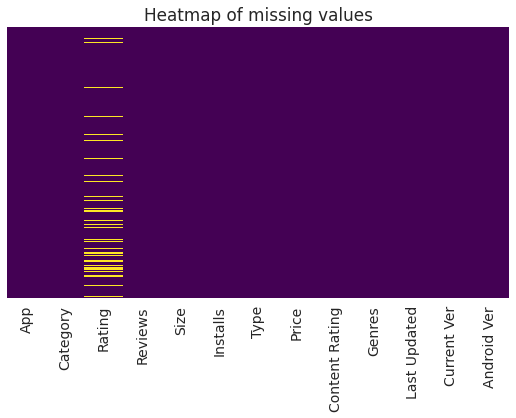

In [197]:
plt.title('Heatmap of missing values')
sns.heatmap(go_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In the above graph a heatmap is displayed with missing data in each coloumn fro the following heatmap we conclude that a lot of values of ratings are missing.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

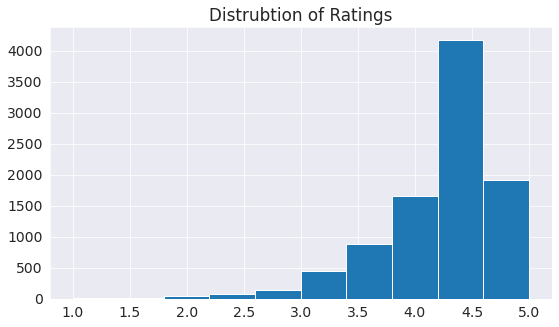

In [136]:
plt.title('Distrubtion of Ratings')
plt.hist(raw.Rating);      

In the above histogram the ratings are plotted with the numbers of apps that concludes that a number of apps are in the range of rating 4 to 5

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<BarContainer object of 15 artists>

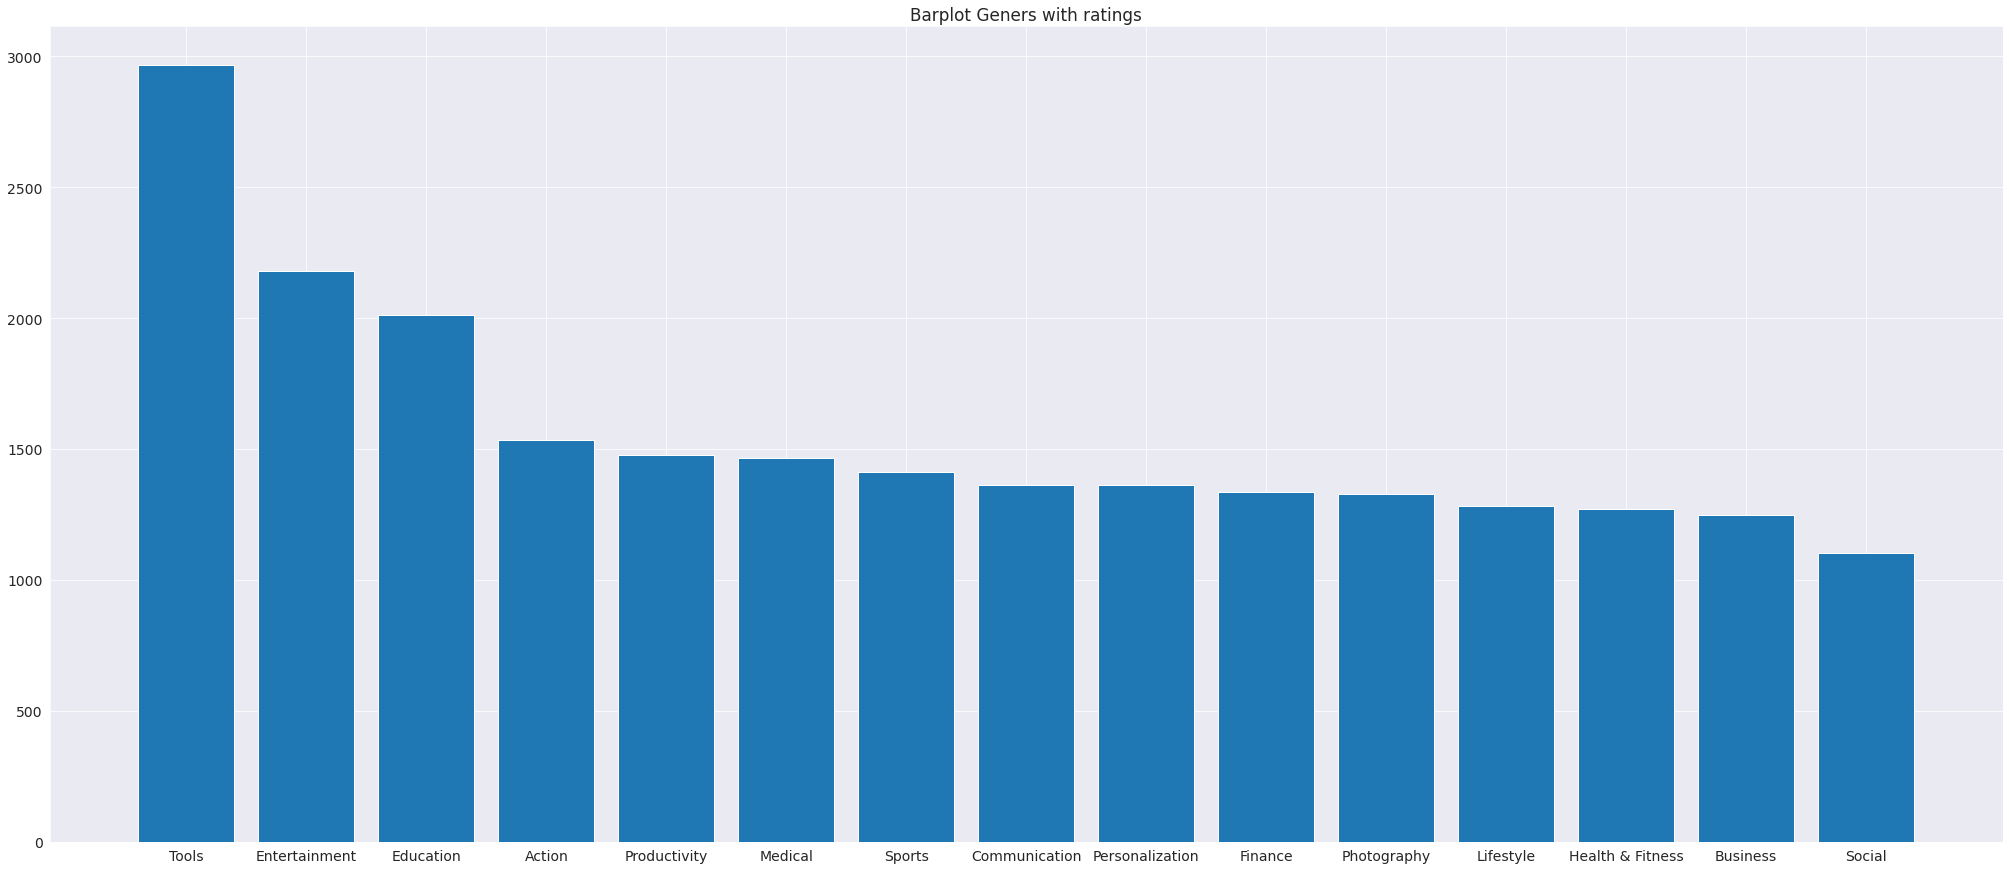

In [199]:
plt.figure(figsize=(35,15))
plt.title('Barplot Geners with ratings')
g=raw.groupby('Genres').sum()
o=g.sort_values(by='Rating',ascending=False).head(15)
plt.bar(o.index,o.Rating)

In the above bar plot the top 15 Genres with the highest ratings are plotted with the sum of their total ratings this shows that Tools Genres has the highest total ratings in the which are close to 3k.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Scatterplotbetween Installs and ratings'}, xlabel='Rating', ylabel='Installs'>

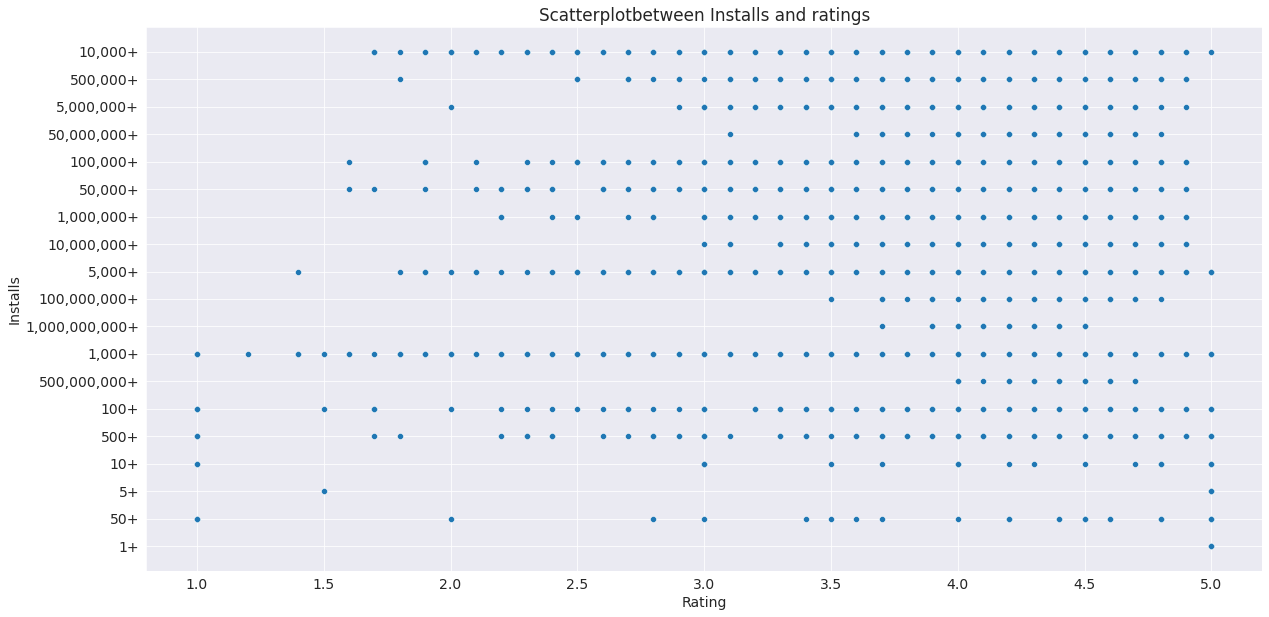

In [203]:
plt.figure(figsize=(20,10))
plt.title('Scatterplotbetween Installs and ratings')
sns.scatterplot(raw.Rating,raw.Installs)

In the above scatter plot we have found the their is relation between installs and ratings that is as the installs increases the rating also increases which is very obvious.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

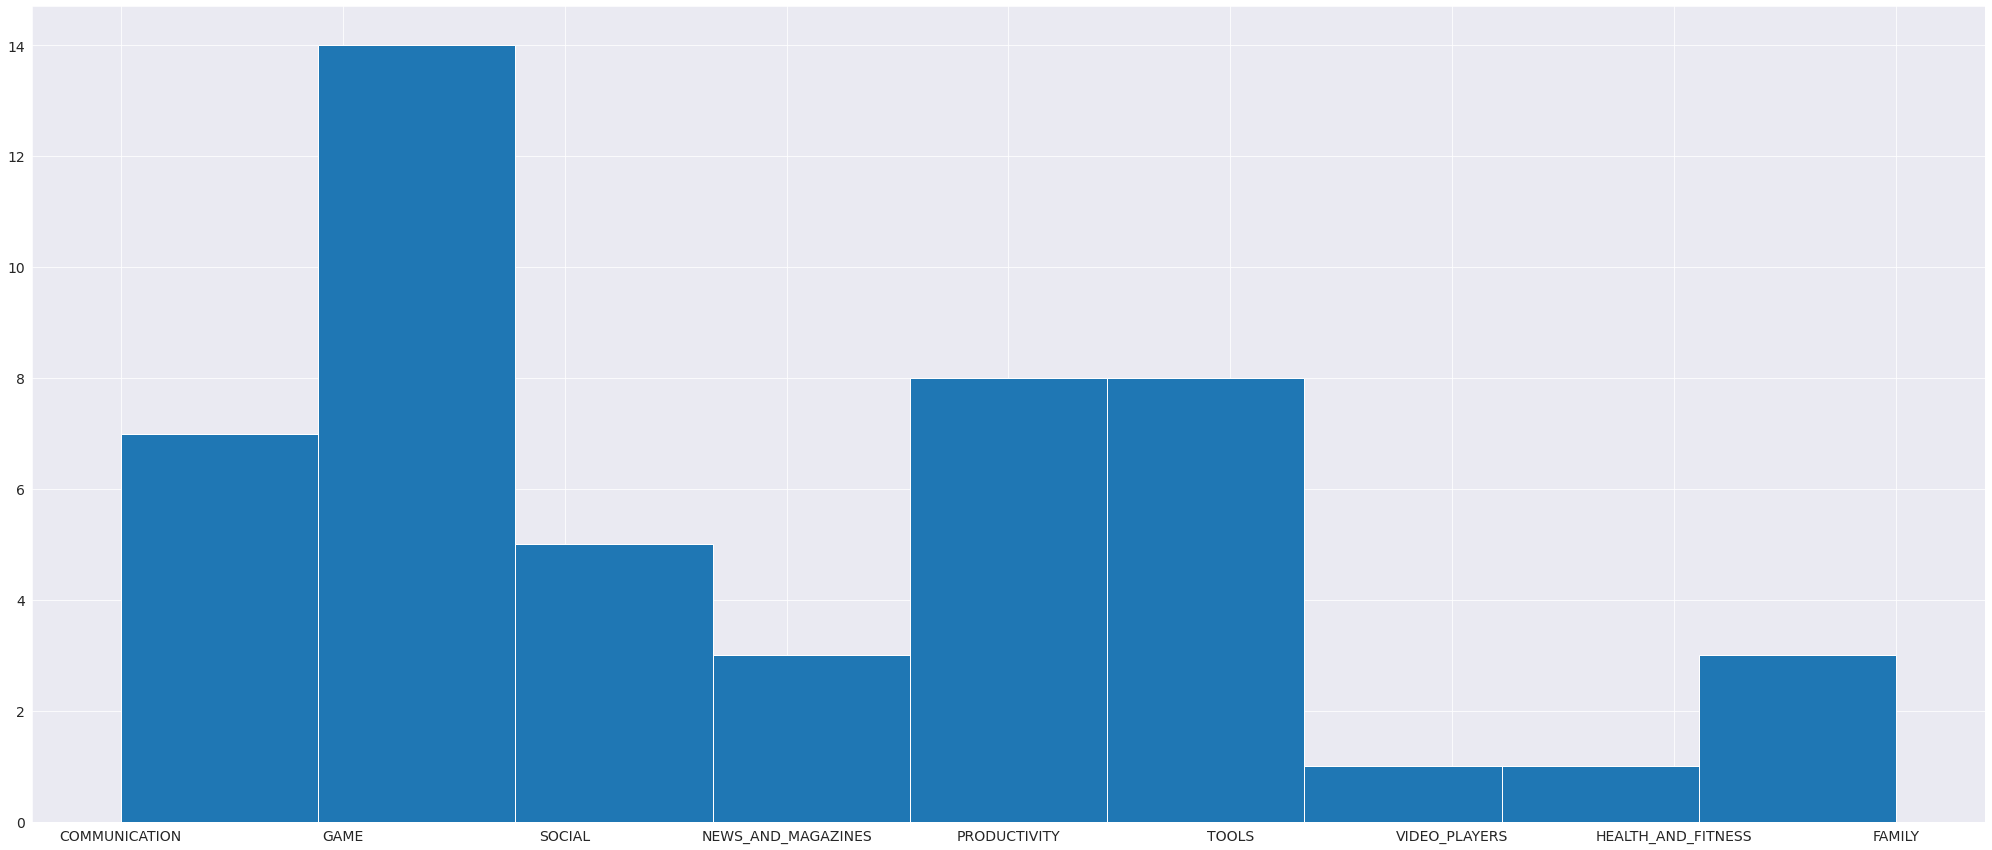

In [221]:
n=raw.sort_values(by=['Installs'],ascending=False).head(50)
plt.figure(figsize=(35,15))
plt.hist(n.Category,bins=9);

In the above histogram we have tried to display which category apps lies most in the top 50 installed apps in the gmes apps are the most followed by productivity ,tools etc .

Let us save and upload our work to Jovian before continuing

In [222]:
import jovian

In [223]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/zerotopandas-course-project-googleplaystore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore


'https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore'

## Asking and Answering Questions

In the below cells we are going to answer some intersting questions about our dataset by using pandas .

#### Q1: TODO -Is there any missing data in your dataset if so then tell in which coloum data is missing

In [69]:
go_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

#### Q2: TODO - Which are the top 5 category with highest rating

In [75]:
g=raw.groupby('Category').sum()
g.sort_values(by='Rating',ascending=False).head()

,Rating
Category,
FAMILY,7323.9
GAME,4702.1
TOOLS,2970.8
PRODUCTIVITY,1478.2
MEDICAL,1466.2


#### Q3: TODO - Which is the app with highest ratings and highest installs

In [77]:
raw.sort_values(by=['Installs','Rating'],ascending=False).head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


#### Q4: TODO - Which is the most installed paid app

In [104]:
paid=raw.loc[raw.Type != 'Free']
paid.sort_values(by='Installs',ascending=False).head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8449,Cameringo+ Filters Camera,PHOTOGRAPHY,4.6,28107,5.7M,"500,000+",Paid,$2.99,Everyone,Photography,"June 11, 2018",2.8.26,4.0 and up


#### Q5: TODO -Which are the games with rating of 5

In [118]:
game=raw.loc[(raw.Category=='GAME')&(raw.Rating==5)]
game

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5795,Axe Champs! Wars,GAME,5.0,8,25M,50+,Free,0,Everyone,Arcade,"June 26, 2018",1.1,4.1 and up
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15M,100+,Free,0,Everyone,Arcade,"September 27, 2017",1.1,4.2 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5+,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10+,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7466,211:CK,GAME,5.0,8,38M,10+,Paid,$0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
7698,CP Trivia,GAME,5.0,5,12M,100+,Free,0,Everyone,Trivia,"August 6, 2018",0.99,5.0 and up
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
9265,EC Mover,GAME,5.0,5,4.6M,10+,Free,0,Everyone,Racing,"August 1, 2018",1.11,4.0.3 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Let us save and upload our work to Jovian before continuing.

In [224]:
import jovian

In [225]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/zerotopandas-course-project-googleplaystore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore


'https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore'

## Inferences and Conclusion

The conclusion of the above project is that the free tools,games are one of the most used apps on the playstore.

In [226]:
import jovian

In [227]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "omkarghogale1600/zerotopandas-course-project-googleplaystore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore


'https://jovian.ai/omkarghogale1600/zerotopandas-course-project-googleplaystore'

## References and Future Work

In the future scope of our project we could add data from various other app stores so that a large scale of apps can be analysied.

In [230]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>